<a href="https://colab.research.google.com/github/Roberto-Front-end/An-lise-gera-o-de-energia.i/blob/main/Analise_gera%C3%A7%C3%A3o_de_energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd

In [79]:
df_hidro = pd.read_excel("/content/DADOS_HIDROLOGICOS_RES_2025.xlsx")

In [80]:
df_hidro2 =pd.read_excel("/content/DADOS_HIDROLOGICOS_HO_2025_11.xlsx")


In [81]:
df_carga = pd.read_excel("/content/CARGA_MENSAL.xlsx")
df_carga['din_instante'] = pd.to_datetime(df_carga['din_instante'])
display(df_carga)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2000-01-31,2397.644086
1,NE,Nordeste,2000-01-31,5666.025269
2,S,Sul,2000-01-31,6726.535148
3,SE,Sudeste/Centro-Oeste,2000-01-31,24463.186156
4,N,Norte,2000-02-29,2409.035489
...,...,...,...,...
1223,SE,Sudeste/Centro-Oeste,2025-06-30,42680.892953
1224,N,Norte,2025-07-31,8052.123682
1225,NE,Nordeste,2025-07-31,12484.216987
1226,S,Sul,2025-07-31,13588.943805


In [82]:
print(df_carga.info())
print(df_carga['id_subsistema'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_subsistema          1228 non-null   object        
 1   nom_subsistema         1228 non-null   object        
 2   din_instante           1228 non-null   datetime64[ns]
 3   val_cargaenergiamwmed  1228 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.5+ KB
None
['N' 'NE' 'S' 'SE']


In [83]:
df_carga_monthly = df_carga.groupby(pd.Grouper(key='din_instante', freq='M'))['val_cargaenergiamwmed'].sum().reset_index()
display(df_carga_monthly.head())

/tmp/ipython-input-3062354457.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_carga_monthly = df_carga.groupby(pd.Grouper(key='din_instante', freq='M'))['val_cargaenergiamwmed'].sum().reset_index()


,din_instante,val_cargaenergiamwmed
0,2000-01-31,39253.390659
1,2000-02-29,40665.397845
2,2000-03-31,40556.063720
3,2000-04-30,40214.947917
4,2000-05-31,40408.382258


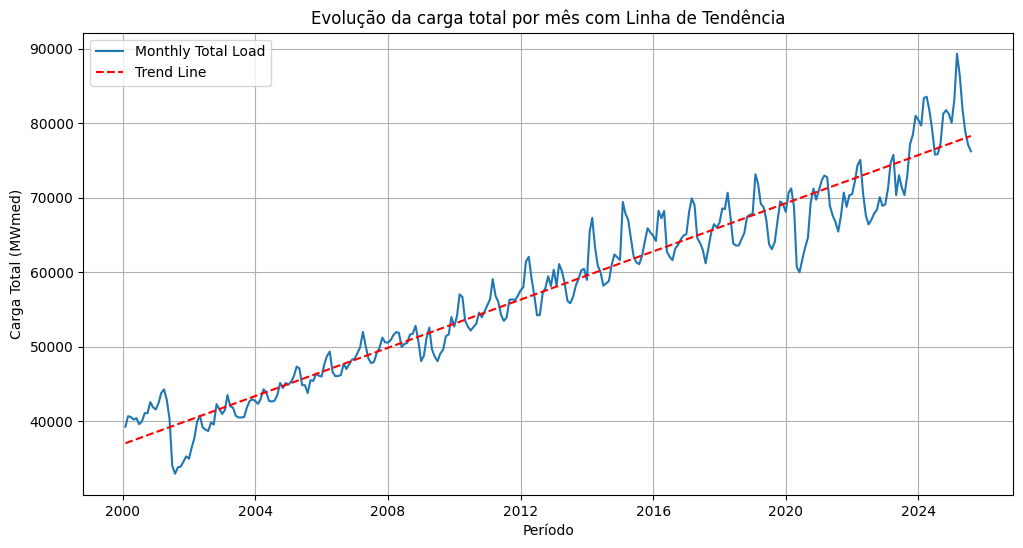

In [84]:
import numpy as np
from scipy.stats import linregress

df_carga_monthly['time_numeric'] = (df_carga_monthly['din_instante'] - df_carga_monthly['din_instante'].min()).dt.days

slope, intercept, r_value, p_value, std_err = linregress(df_carga_monthly['time_numeric'], df_carga_monthly['val_cargaenergiamwmed'])

df_carga_monthly['trend'] = intercept + slope * df_carga_monthly['time_numeric']

plt.figure(figsize=(12, 6))
plt.plot(df_carga_monthly['din_instante'], df_carga_monthly['val_cargaenergiamwmed'], label='Monthly Total Load')
plt.plot(df_carga_monthly['din_instante'], df_carga_monthly['trend'], color='red', linestyle='--', label='Trend Line')
plt.title('Evolução da carga total por mês com Linha de Tendência')
plt.xlabel('Período')
plt.ylabel('Carga Total (MWmed)')
plt.grid(True)
plt.legend()
plt.show()

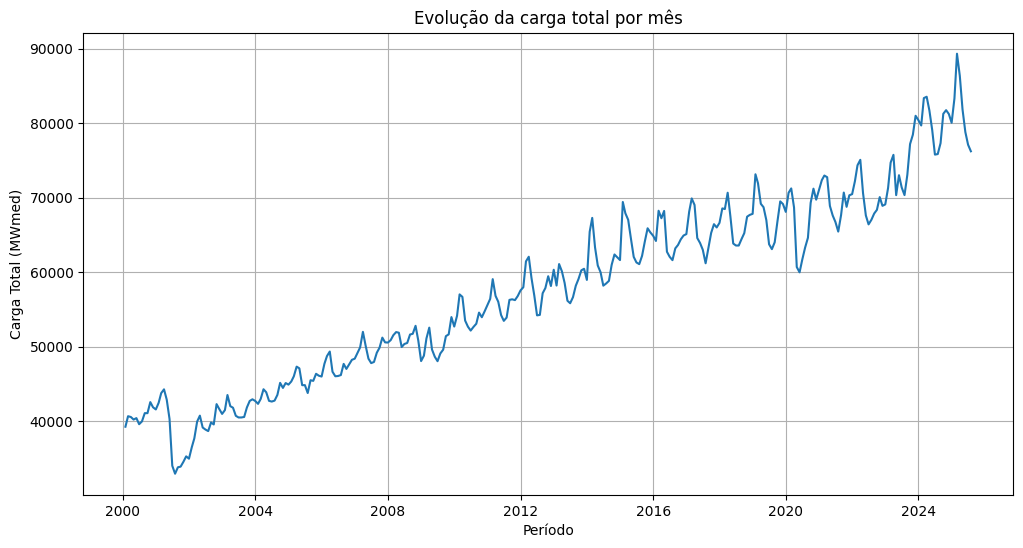

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(df_carga_monthly['din_instante'], df_carga_monthly['val_cargaenergiamwmed'])
plt.title('Evolução da carga total por mês')
plt.xlabel('Período')
plt.ylabel('Carga Total (MWmed)')
plt.grid(True)
plt.show()

In [86]:
print(f"A inclinação (slope) da linha de tendência é: {slope:.2f}")

A inclinação (slope) da linha de tendência é: 4.43


/tmp/ipython-input-649369297.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_carga_monthly_2022_2024 = df_carga_2022_2024.groupby(pd.Grouper(key='din_instante', freq='M'))['val_cargaenergiamwmed'].sum().reset_index()


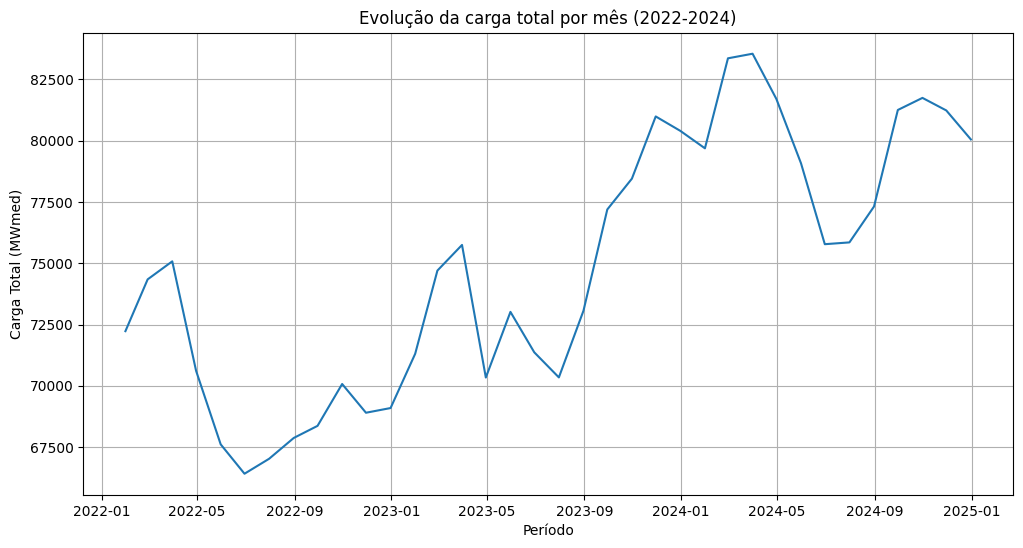

In [87]:
df_carga_2022_2024 = df_carga[(df_carga['din_instante'].dt.year >= 2022) & (df_carga['din_instante'].dt.year <= 2024)].copy()


df_carga_monthly_2022_2024 = df_carga_2022_2024.groupby(pd.Grouper(key='din_instante', freq='M'))['val_cargaenergiamwmed'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(df_carga_monthly_2022_2024['din_instante'], df_carga_monthly_2022_2024['val_cargaenergiamwmed'])
plt.title('Evolução da carga total por mês (2022-2024)')
plt.xlabel('Período')
plt.ylabel('Carga Total (MWmed)')
plt.grid(True)
plt.show()



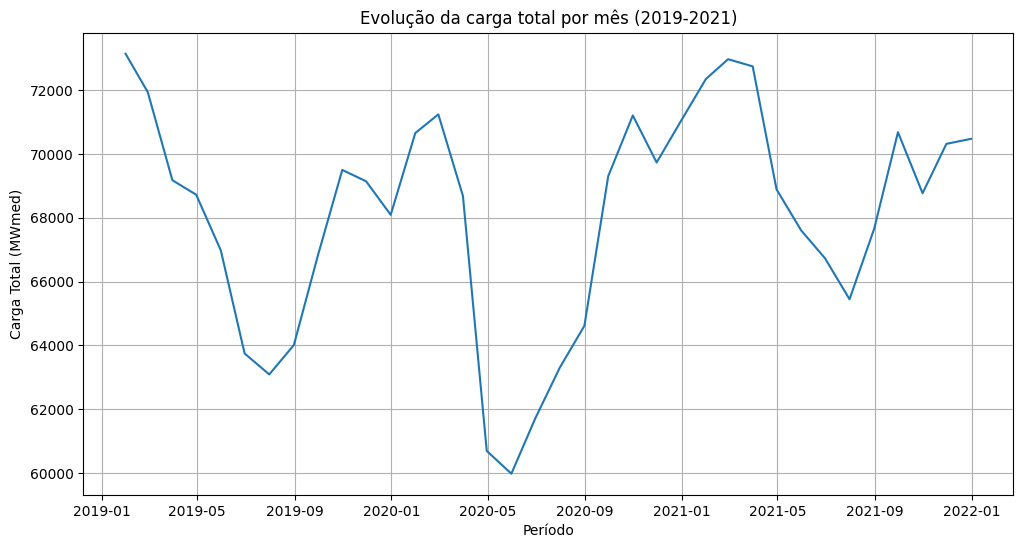

In [88]:
df_carga_monthly_2019_2021_filtered = df_carga[(df_carga['din_instante'].dt.year >= 2019) & (df_carga['din_instante'].dt.year <= 2021)].copy()

df_carga_monthly_2019_2021 = df_carga_monthly_2019_2021_filtered.groupby(pd.Grouper(key='din_instante', freq='ME'))['val_cargaenergiamwmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_carga_monthly_2019_2021['din_instante'], df_carga_monthly_2019_2021['val_cargaenergiamwmed'])
plt.title('Evolução da carga total por mês (2019-2021)')
plt.xlabel('Período')
plt.ylabel('Carga Total (MWmed)')
plt.grid(True)
plt.show()

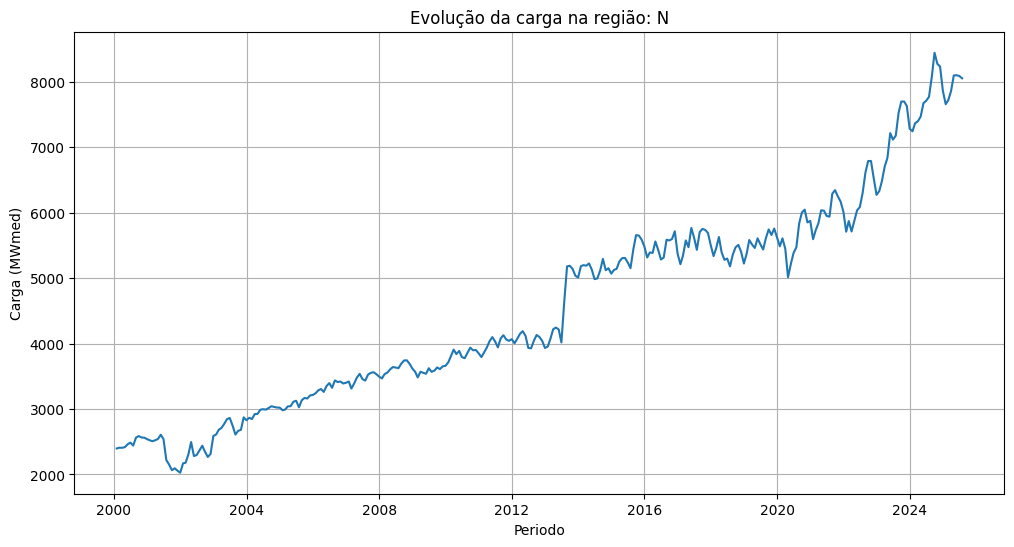

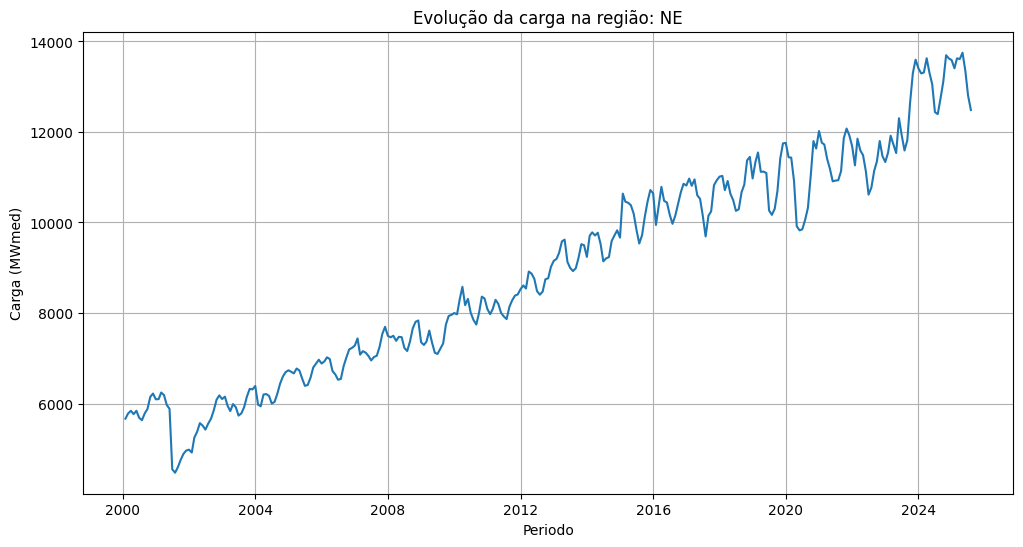

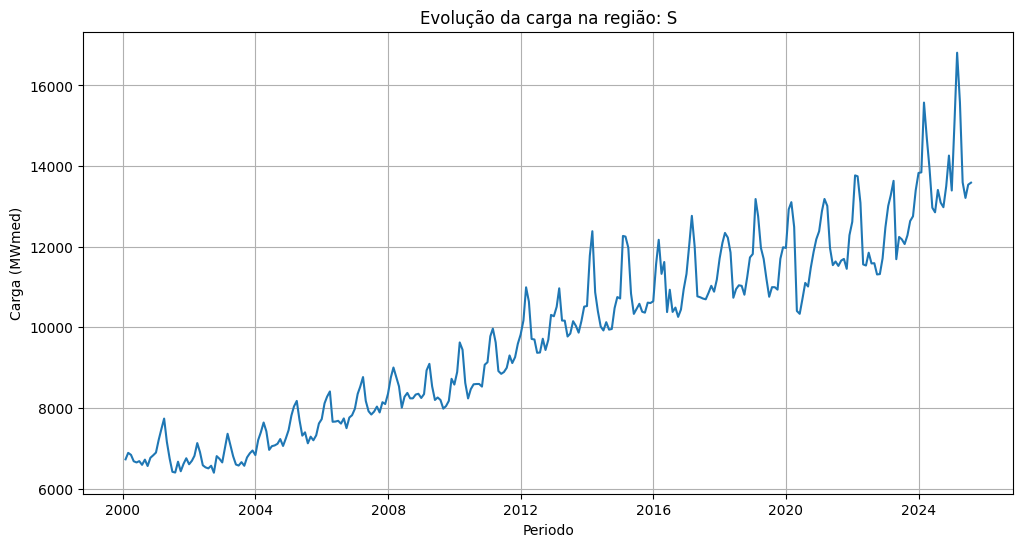

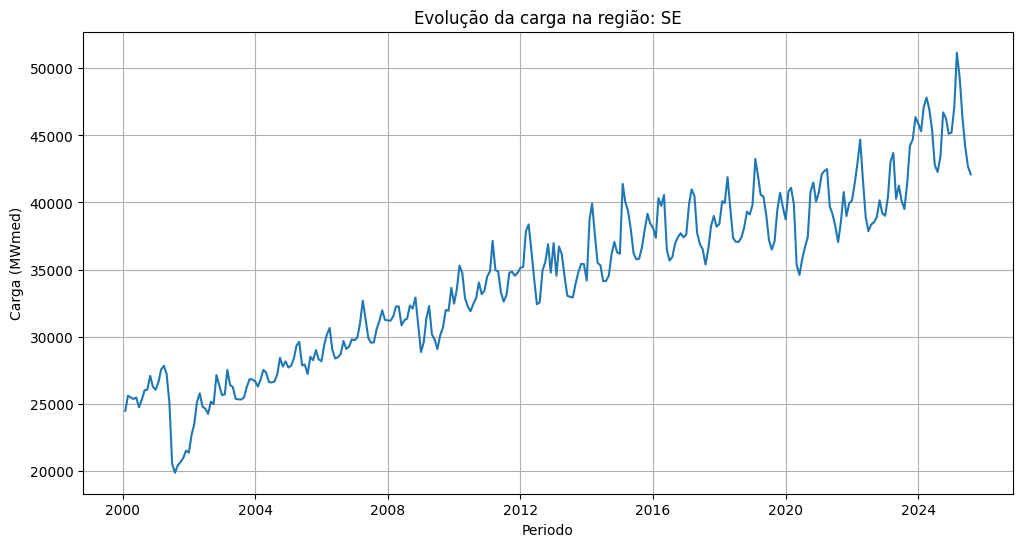

In [89]:
import matplotlib.pyplot as plt

unique_subsystems = df_carga['id_subsistema'].unique()

for subsystem in unique_subsystems:
    df_subsystem = df_carga[df_carga['id_subsistema'] == subsystem]
    plt.figure(figsize=(12, 6))
    plt.plot(df_subsystem['din_instante'], df_subsystem['val_cargaenergiamwmed'])
    plt.title(f'Evolução da carga na região: {subsystem}')
    plt.xlabel('Periodo')
    plt.ylabel('Carga (MWmed)')
    plt.grid(True)
    plt.show()

In [90]:

df_carga['din_instante'] = pd.to_datetime(df_carga['din_instante'])

df_carga['Year'] = df_carga['din_instante'].dt.year
df_carga['Month'] = df_carga['din_instante'].dt.month

df_pivot = df_carga.pivot_table(index='Month', columns='Year', values='val_cargaenergiamwmed', aggfunc='sum')

ratio_data = {}
for year in df_pivot.columns:
    if year > df_pivot.columns.min():
        previous_year = year - 1
        if previous_year in df_pivot.columns:
            ratio_data[f'{year}/{previous_year}'] = df_pivot[year] / df_pivot[previous_year]

df_ratio = pd.DataFrame(ratio_data)

df_ratio = df_ratio.reset_index()


df_ratio = df_ratio.rename(columns={'Month': 'Mês'})

display(df_ratio)

,Mês,2001/2000,2002/2001,2003/2002,2004/2003,2005/2004,2006/2005,2007/2006,2008/2007,2009/2008,...,2016/2015,2017/2016,2018/2017,2019/2018,2020/2019,2021/2020,2022/2021,2023/2022,2024/2023,2025/2024
0,1,1.081801,0.859520,1.136671,1.020166,1.070920,1.052388,1.030803,1.034717,0.959011,...,0.924647,1.061356,1.006369,1.066842,0.966016,1.023941,0.998376,0.987233,1.117541,1.045645
1,2,1.076139,0.861334,1.154305,0.987902,1.070626,1.059047,1.023756,1.032956,0.991726,...,1.004975,1.024221,0.979577,1.050629,0.990314,1.024275,1.018824,1.004824,1.115923,1.071484
2,3,1.091627,0.902316,1.051791,1.053943,1.068594,1.042808,1.053605,0.999352,1.011515,...,1.003176,1.026484,1.023732,0.978985,0.992853,1.059151,1.032087,1.008919,1.102983,1.033593
3,4,1.066498,0.949908,1.026054,1.049677,1.073130,0.990367,1.075035,1.034630,0.956553,...,1.057186,0.946687,1.044787,1.018475,0.883144,1.135127,1.024984,0.996101,1.161560,1.001692
4,5,0.996998,0.971747,1.040101,1.049277,1.049269,1.026709,1.051343,1.032216,0.973846,...,1.011151,1.018600,0.998968,1.049078,0.895484,1.127200,1.000112,1.079933,1.083029,0.996586
5,6,0.859201,1.142868,1.041651,1.052718,1.051722,1.027343,1.037571,1.053765,0.954085,...,1.012403,1.015128,1.009122,1.002658,0.967968,1.081506,0.995227,1.074582,1.061802,1.017590
6,7,0.824340,1.173713,1.047263,1.055886,1.023835,1.055073,1.038069,1.053151,0.972126,...,1.008755,0.993186,1.038959,0.992355,1.003384,1.033852,1.024129,1.049522,1.078304,1.004903
7,8,0.823146,1.177879,1.018603,1.073027,1.045178,1.048238,1.031370,1.049667,0.960637,...,1.016117,1.001041,1.018836,0.993150,1.009444,1.047026,1.003267,1.076503,1.058193,NaN
8,9,0.825224,1.167095,1.057511,1.079026,1.005942,1.035293,1.060519,1.037558,0.993815,...,0.993147,1.025390,0.999585,1.023783,1.037582,1.019910,0.967246,1.129130,1.052585,NaN
9,10,0.811883,1.223846,1.010136,1.040912,1.042680,1.027512,1.075106,1.030965,0.978248,...,0.977578,1.031494,1.015127,1.030442,1.024585,0.965748,1.018994,1.119555,1.041995,NaN


In [91]:
ratio_data_only = df_ratio.drop(columns='Mês')

ratio_vector = ratio_data_only.values.flatten()

ratio_vector_cleaned = ratio_vector[~np.isnan(ratio_vector)]

print(ratio_vector_cleaned)

[1.08180149 0.85952012 1.13667102 1.02016555 1.07091973 1.05238815
 1.03080348 1.03471704 0.95901067 1.10989021 1.04179289 1.02769229
 1.00389965 1.12400894 1.06108286 0.92464653 1.06135567 1.0063693
 1.06684162 0.96601586 1.02394101 0.99837613 0.98723334 1.11754133
 1.04564506 1.07613855 0.86133395 1.15430512 0.98790168 1.07062637
 1.05904697 1.02375628 1.03295605 0.99172579 1.11551581 1.03587352
 1.04037859 0.99417712 1.10143307 1.00925648 1.00497507 1.02422102
 0.97957699 1.05062884 0.99031446 1.02427513 1.01882384 1.00482421
 1.1159226  1.07148426 1.09162734 0.90231619 1.05179128 1.05394278
 1.06859408 1.04280824 1.05360485 0.9993522  1.01151517 1.07850274
 1.00240241 1.09242451 0.96846151 1.05348416 1.0584775  1.00317559
 1.02648369 1.02373227 0.97898494 0.99285288 1.05915146 1.03208721
 1.00891933 1.10298282 1.03359273 1.06649751 0.94990836 1.02605446
 1.04967714 1.07312972 0.99036673 1.0750346  1.03462986 0.95655272
 1.07828792 1.04710052 1.05683839 0.98893332 1.04008687 1.05967

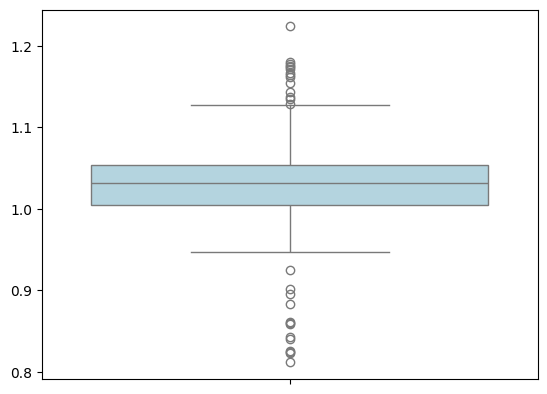

In [92]:
import seaborn as sns
a = sns.boxplot(data=ratio_vector_cleaned, color='lightblue')

In [93]:
import numpy as np
from scipy.stats import mode

# Calculate descriptive statistics
mean_ratio = np.mean(ratio_vector_cleaned)
median_ratio = np.median(ratio_vector_cleaned)
mode_ratio = mode(ratio_vector_cleaned)[0] # mode returns mode and count, we only need the mode value
quartiles = np.percentile(ratio_vector_cleaned, [25, 50, 75])
std_dev_ratio = np.std(ratio_vector_cleaned)
variance_ratio = np.var(ratio_vector_cleaned)
min_ratio = np.min(ratio_vector_cleaned)
max_ratio = np.max(ratio_vector_cleaned)

# Display the results
print(f"Média: {mean_ratio:.4f}")
print(f"Mediana: {median_ratio:.4f}")
print(f"Moda: {mode_ratio:.4f}")
print(f"1º Quartil: {quartiles[0]:.4f}")
print(f"3º Quartil: {quartiles[2]:.4f}")
print(f"Desvio Padrão: {std_dev_ratio:.4f}")
print(f"Variância: {variance_ratio:.4f}")
print(f"Mínimo: {min_ratio:.4f}")
print(f"Máximo: {max_ratio:.4f}")

Média: 1.0301
Mediana: 1.0321
Moda: 0.8119
1º Quartil: 1.0049
3º Quartil: 1.0539
Desvio Padrão: 0.0573
Variância: 0.0033
Mínimo: 0.8119
Máximo: 1.2238


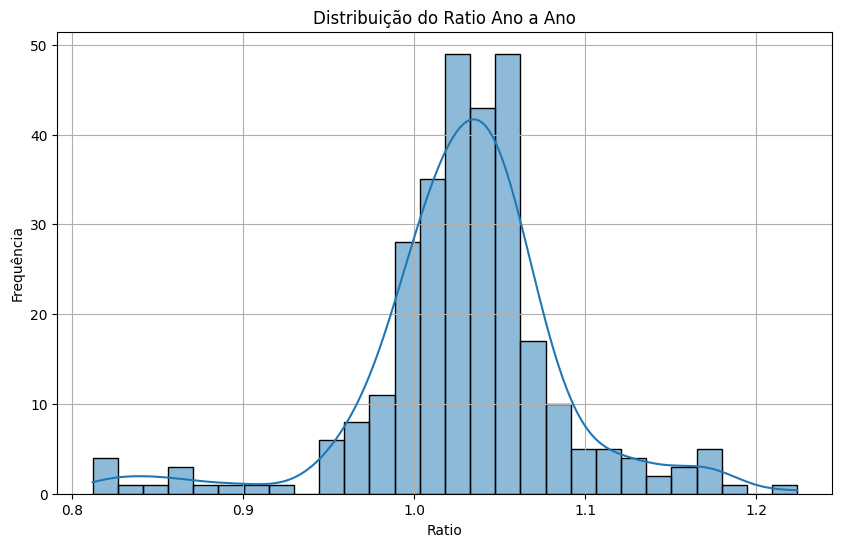

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(ratio_vector_cleaned, kde=True)
plt.title('Distribuição do Ratio Ano a Ano')
plt.xlabel('Ratio')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [95]:
df_balanco = pd.read_csv("/content/BALANCO_ENERGIA_SUBSISTEMA_2025.csv",sep=';')
df_balanco

,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,NE,NORDESTE,2025-01-01 00:00:00,2219.280,415.154,16070.653,0.0,12251.182,6453.905
1,N,NORTE,2025-01-01 00:00:00,6818.532,1576.087,401.685,0.0,7097.751,1698.553
2,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 00:00:00,40778.712,6835.338,17662.519,1.0,65277.570,0.000
3,SE,SUDESTE/CENTRO-OESTE,2025-01-01 00:00:00,23801.970,4510.835,5.001,0.0,35374.033,-7056.227
4,S,SUL,2025-01-01 00:00:00,7938.930,333.262,1185.180,1.0,10554.603,-1096.231
...,...,...,...,...,...,...,...,...,...
37555,NE,NORDESTE,2025-11-09 23:00:00,2427.193,2051.038,12912.761,0.0,14937.346,2453.646
37556,N,NORTE,2025-11-09 23:00:00,5610.330,2678.845,386.031,0.0,9714.096,-1038.890
37557,SIN,SISTEMA INTERLIGADO NACIONAL,2025-11-09 23:00:00,45869.226,13956.674,13575.771,1.0,73402.670,0.000
37558,SE,SUDESTE/CENTRO-OESTE,2025-11-09 23:00:00,27080.177,7783.387,61.147,0.0,38149.694,-3224.983


In [96]:
df_balanco['din_instante'] = pd.to_datetime(df_balanco['din_instante'])
columns_to_float = ['val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar', 'val_carga', 'val_intercambio']
for col in columns_to_float:
    df_balanco[col] = df_balanco[col].astype(float)

display(df_balanco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37560 entries, 0 to 37559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_subsistema      37560 non-null  object        
 1   nom_subsistema     37560 non-null  object        
 2   din_instante       37560 non-null  datetime64[ns]
 3   val_gerhidraulica  37560 non-null  float64       
 4   val_gertermica     37560 non-null  float64       
 5   val_gereolica      37560 non-null  float64       
 6   val_gersolar       37560 non-null  float64       
 7   val_carga          37560 non-null  float64       
 8   val_intercambio    37560 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.6+ MB


None

In [97]:
df_SIN = df_balanco[df_balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']
display(df_SIN)

,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
2,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 00:00:00,40778.712,6835.338,17662.519,1.000,65277.57,0.0
7,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 01:00:00,41095.058,6795.204,17823.560,1.000,65714.82,0.0
12,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 02:00:00,40503.812,6679.854,18394.964,1.000,65579.63,0.0
17,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 03:00:00,39835.074,6577.851,18176.561,1.000,64590.49,0.0
22,SIN,SISTEMA INTERLIGADO NACIONAL,2025-01-01 04:00:00,38455.247,6596.102,18550.189,13.463,63615.00,0.0
...,...,...,...,...,...,...,...,...,...
37537,SIN,SISTEMA INTERLIGADO NACIONAL,2025-11-09 19:00:00,55693.357,13814.772,12036.111,69.257,81613.50,0.0
37542,SIN,SISTEMA INTERLIGADO NACIONAL,2025-11-09 20:00:00,54476.868,13843.740,12664.837,8.503,80993.95,0.0
37547,SIN,SISTEMA INTERLIGADO NACIONAL,2025-11-09 21:00:00,52499.546,13782.896,13440.072,1.012,79723.53,0.0
37552,SIN,SISTEMA INTERLIGADO NACIONAL,2025-11-09 22:00:00,49098.525,13858.491,14201.166,1.000,77159.18,0.0


In [98]:
df_SIN_monthly = df_SIN.groupby(pd.Grouper(key='din_instante', freq='ME')).sum().reset_index()
display(df_SIN_monthly)

,din_instante,id_subsistema,nom_subsistema,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,2025-01-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,4.363721e+07,4.931693e+06,5.880341e+06,7669029.866,61827094.36,291178.74
1,2025-02-28,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,4.134836e+07,4.462198e+06,7.430715e+06,7249841.529,59946955.71,544158.23
2,2025-03-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,4.252417e+07,4.698682e+06,8.463509e+06,8393068.036,63963614.22,115813.28
3,2025-04-30,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,3.737820e+07,5.212281e+06,7.440183e+06,7082952.025,57161989.42,-48373.65
4,2025-05-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,3.335419e+07,6.082139e+06,1.054653e+07,6752940.185,56723474.55,12325.94
5,2025-06-30,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,3.030430e+07,7.158221e+06,1.069239e+07,6186793.388,53726536.18,615172.67
6,2025-07-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.866400e+07,9.535742e+06,1.124533e+07,6852675.782,55156699.09,1141050.91
7,2025-08-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.662602e+07,1.033812e+07,1.168799e+07,7297531.761,55608463.58,341205.64
8,2025-09-30,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.684911e+07,8.862355e+06,1.237819e+07,7682711.103,55741266.83,31103.37
9,2025-10-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.808231e+07,1.013697e+07,1.184242e+07,8464726.575,58547589.28,-21165.02


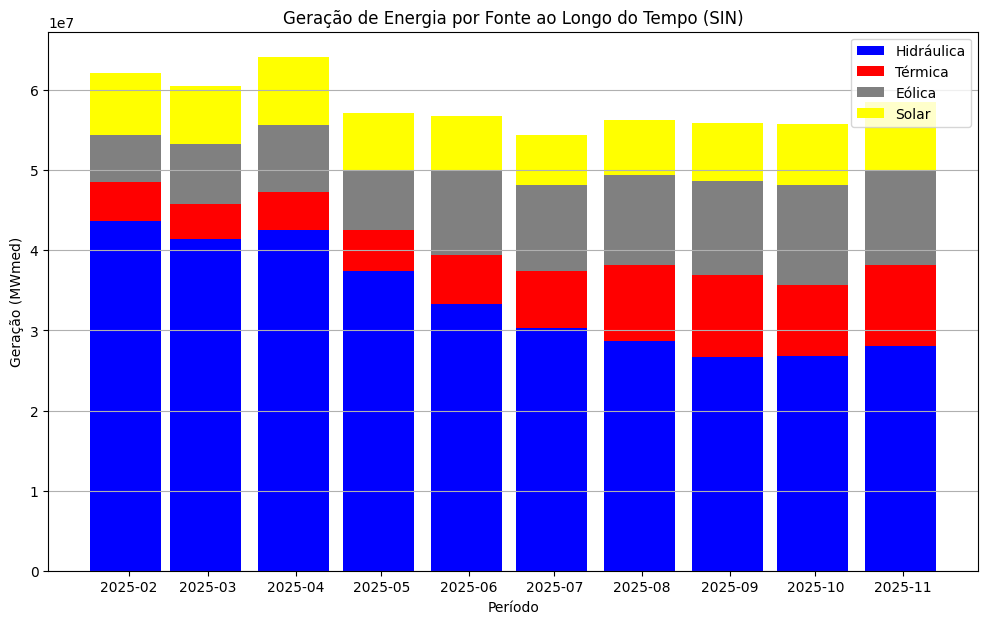

In [99]:
df_SIN_monthly_filtered = df_SIN_monthly[:-1]

plt.figure(figsize=(12, 7))

bar_width = 25

plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gerhidraulica'], color='blue', label='Hidráulica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gertermica'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'], color='red', label='Térmica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gereolica'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'] + df_SIN_monthly_filtered['val_gertermica'], color='gray', label='Eólica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gersolar'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'] + df_SIN_monthly_filtered['val_gertermica'] + df_SIN_monthly_filtered['val_gereolica'], color='yellow', label='Solar', width=bar_width)

plt.title('Geração de Energia por Fonte ao Longo do Tempo (SIN)')
plt.xlabel('Período')
plt.ylabel('Geração (MWmed)')
plt.legend()
plt.grid(axis='y')
plt.show()

In [100]:
df_support = pd.read_excel("/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2023.xlsx")
df_support

,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,NE,NORDESTE,2023-01-01 00:00:00,3874.072998,677.062988,13305.261719,1.932,10455.818,7402.512
1,N,NORTE,2023-01-01 00:00:00,7858.744141,877.854980,211.772003,0.000,5990.553,2957.818
2,SIN,SISTEMA INTERLIGADO NACIONAL,2023-01-01 00:00:00,39057.309000,5698.335000,14138.750000,21.155,58904.080,11.470
3,SE,SUDESTE/CENTRO-OESTE,2023-01-01 00:00:00,24661.111328,4071.576904,6.000000,18.223,32183.885,-3426.974
4,S,SUL,2023-01-01 00:00:00,2663.381104,71.839996,615.716003,1.000,10273.827,-6921.890
...,...,...,...,...,...,...,...,...,...
43795,NE,NORDESTE,2023-12-31 23:00:00,3433.027100,484.122986,2954.218018,1.549,12144.917,-5272.000
43796,N,NORTE,2023-12-31 23:00:00,3334.500977,2430.850098,3.433000,0.000,6641.410,-872.626
43797,SIN,SISTEMA INTERLIGADO NACIONAL,2023-12-31 23:00:00,52629.359000,8982.848000,3588.314000,11.241,65212.050,-0.290
43798,SE,SUDESTE/CENTRO-OESTE,2023-12-31 23:00:00,32794.011719,5073.425781,8.500000,8.692,36060.076,1824.555


In [101]:
file_list = []
for year in range(2000, 2025):
    file_path = f"/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_{year}.xlsx"
    file_list.append(file_path)

print(file_list)

['/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2000.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2001.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2002.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2003.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2004.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2005.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2006.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2007.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2008.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2009.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2010.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2011.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2012.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2013.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2014.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2015.xlsx', '/content/Balanco/BALANCO_ENERGIA_SUBSISTEMA_2016.xlsx', '/content/Balanco/BALANCO_ENER

In [102]:
all_dataframes = []
for file_path in file_list:
    try:
        df_temp = pd.read_excel(file_path)
        all_dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

if all_dataframes:
    df_balanco_completo = pd.concat(all_dataframes, ignore_index=True)
    print("DataFrames concatenated successfully.")
else:
    print("No dataframes were loaded.")
    df_balanco_completo = pd.DataFrame()

display(df_balanco_completo.head())

DataFrames concatenated successfully.


,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,NE,NORDESTE,2000-01-01,5337.7,0.0,0.0,0.0,5340.2,-2.5
1,N,NORTE,2000-01-01,2422.5,0.0,0.0,0.0,2373.7,48.8
2,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01,31977.0,2649.1,NaN,NaN,34673.9,-47.8
3,SE,SUDESTE/CENTRO-OESTE,2000-01-01,20479.8,1418.6,0.0,0.0,21183.0,715.4
4,S,SUL,2000-01-01,3737.0,1230.5,0.0,0.0,5777.0,-809.5


In [103]:
df_balanco_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095717 entries, 0 to 1095716
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id_subsistema      1095717 non-null  object        
 1   nom_subsistema     1095717 non-null  object        
 2   din_instante       1095717 non-null  datetime64[ns]
 3   val_gerhidraulica  1095669 non-null  float64       
 4   val_gertermica     1095645 non-null  float64       
 5   val_gereolica      1040979 non-null  float64       
 6   val_gersolar       959676 non-null   float64       
 7   val_carga          1095386 non-null  float64       
 8   val_intercambio    1095386 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 75.2+ MB


In [104]:
display(df_balanco_completo.head(10))

,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,NE,NORDESTE,2000-01-01 00:00:00,5337.7,0.0,0.0,0.0,5340.2,-2.5
1,N,NORTE,2000-01-01 00:00:00,2422.5,0.0,0.0,0.0,2373.7,48.8
2,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 00:00:00,31977.0,2649.1,NaN,NaN,34673.9,-47.8
3,SE,SUDESTE/CENTRO-OESTE,2000-01-01 00:00:00,20479.8,1418.6,0.0,0.0,21183.0,715.4
4,S,SUL,2000-01-01 00:00:00,3737.0,1230.5,0.0,0.0,5777.0,-809.5
5,NE,NORDESTE,2000-01-01 01:00:00,5177.9,0.0,0.0,0.0,5180.8,-2.9
6,N,NORTE,2000-01-01 01:00:00,2769.3,0.0,0.0,0.0,2331.6,437.7
7,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 01:00:00,30903.3,2551.8,NaN,NaN,33503.0,-47.9
8,SE,SUDESTE/CENTRO-OESTE,2000-01-01 01:00:00,20110.0,1317.3,0.0,0.0,20409.9,1017.4
9,S,SUL,2000-01-01 01:00:00,2846.1,1234.5,0.0,0.0,5580.7,-1500.1


In [105]:
df_balanco_completo_SIN = df_balanco_completo[df_balanco_completo['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL'].copy()
display(df_balanco_completo_SIN.head())

,id_subsistema,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
2,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 00:00:00,31977.0,2649.1,NaN,NaN,34673.9,-47.8
7,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 01:00:00,30903.3,2551.8,NaN,NaN,33503.0,-47.9
12,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 02:00:00,29785.2,2454.4,NaN,NaN,32287.6,-48.0
17,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 03:00:00,28659.4,2351.9,NaN,NaN,31059.4,-48.1
22,SIN,SISTEMA INTERLIGADO NACIONAL,2000-01-01 04:00:00,27875.5,2349.1,NaN,NaN,30272.7,-48.1


In [106]:
df_balanco_completo_SIN_monthly = df_balanco_completo_SIN.groupby(pd.Grouper(key='din_instante', freq='ME')).sum().reset_index()
display(df_balanco_completo_SIN_monthly.head())

,din_instante,id_subsistema,nom_subsistema,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
0,2000-01-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.737776e+07,1.795074e+06,0.0,0.0,29204522.65,-31686.9
1,2000-02-29,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.660816e+07,1.665471e+06,0.0,0.0,28303116.90,-29484.1
2,2000-03-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.853523e+07,1.608529e+06,0.0,0.0,30173711.39,-29957.6
3,2000-04-30,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.758148e+07,1.329824e+06,0.0,0.0,28954762.50,-43461.0
4,2000-05-31,SINSINSINSINSINSINSINSINSINSINSINSINSINSINSINS...,SISTEMA INTERLIGADO NACIONALSISTEMA INTERLIGAD...,2.861262e+07,1.292402e+06,0.0,0.0,30063836.40,-158815.1


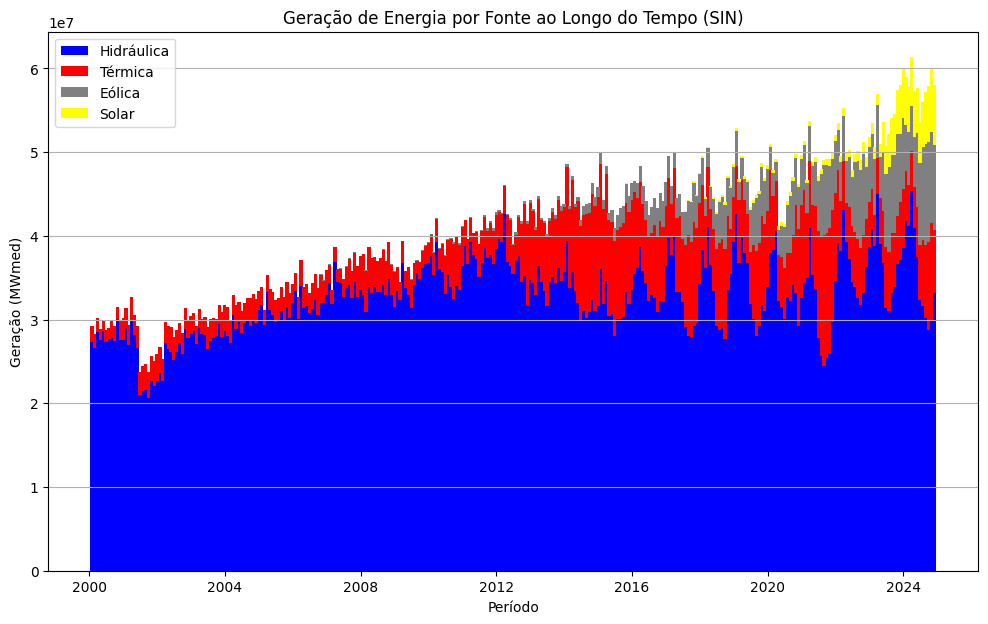

In [107]:
df_SIN_monthly_filtered = df_balanco_completo_SIN_monthly[:-1]

plt.figure(figsize=(12, 7))

bar_width = 35

plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gerhidraulica'], color='blue', label='Hidráulica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gertermica'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'], color='red', label='Térmica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gereolica'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'] + df_SIN_monthly_filtered['val_gertermica'], color='gray', label='Eólica', width=bar_width)
plt.bar(df_SIN_monthly_filtered['din_instante'], df_SIN_monthly_filtered['val_gersolar'], bottom=df_SIN_monthly_filtered['val_gerhidraulica'] + df_SIN_monthly_filtered['val_gertermica'] + df_SIN_monthly_filtered['val_gereolica'], color='yellow', label='Solar', width=bar_width)

plt.title('Geração de Energia por Fonte ao Longo do Tempo (SIN)')
plt.xlabel('Período')
plt.ylabel('Geração (MWmed)')
plt.legend()
plt.grid(axis='y')
plt.show()